<a href="https://colab.research.google.com/github/SauKno/Final_Project_Sales_Projection/blob/main/Classification_Cmp_Cohort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing
import plotly.express as px

pd.set_option('max_columns', 50)

np.random.seed(42)
from datetime import date, datetime, timedelta
%matplotlib inline

In [2]:
ifood_db = pd.read_csv('/content/customer_data.csv')
ifood_db.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0      9/4/12       58       635         88              546              172   
1      3/8/14       38        11          1                6                2   
2     8/21/13       26       426         49              127              111   
3     2/10/14       26        11          4               20               10   
4     1/19/14       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [3]:
ifood_db.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [4]:
#Add column to account for those who have responded to the campaign]
ifood_db['R2Campaign']=ifood_db['AcceptedCmp1']+ifood_db['AcceptedCmp2']+ifood_db['AcceptedCmp3']+ifood_db['AcceptedCmp4']+ifood_db['AcceptedCmp5']+ifood_db['Response']

In [5]:
# Convert birth year to age
ifood_db['Age'] = date.today().year - ifood_db['Year_Birth']
ifood_db 


ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0      9/4/12       58       635         88              546   
1            1      3/8/14       38        11          1                6   
2            0     8/21/13       26       426         49              127   
3            0     2/10/14       26        11          4               20   
4            0     1/19/14       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1     6/13/13       46       709         43              182   
2236         1     6/10/14       56       406          0               30   
2237         0     1/25/14       91       908         48              217   
2238         1     1/24/14        8       428         30              214   
2239         1    10/15/12       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [6]:
ifood_db = ifood_db.drop(columns=['Year_Birth'])

In [7]:
#Find marital status listed
np.unique(ifood_db['Marital_Status'], return_counts=True)


(array(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together',
        'Widow', 'YOLO'], dtype=object),
 array([  2,   3, 232, 864, 480, 580,  77,   2]))

In [8]:
#Replace Marital Status with numbers (Single=Alone, Absurd, YOLO, )
ifood_db.loc[ifood_db['Marital_Status'].isin(['Alone','Absurd','YOLO']), 'Marital_Status']  = 'Single'
ifood_db.head(5)

ID   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0  5524  Graduation         Single  58138.0        0         0      9/4/12   
1  2174  Graduation         Single  46344.0        1         1      3/8/14   
2  4141  Graduation       Together  71613.0        0         0     8/21/13   
3  6182  Graduation       Together  26646.0        1         0     2/10/14   
4  5324         PhD        Married  58293.0        1         0     1/19/14   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  R2Campaign  Age  
0              3         11         1           1   65  
1              3         11         0           0   68  
2              3         11         0           0   57  
3              3         11         0           0   38  
4              3         11         0           0   41

In [9]:
#Check that the code worked
np.unique(ifood_db['Marital_Status'], return_counts=True)

(array(['Divorced', 'Married', 'Single', 'Together', 'Widow'], dtype=object),
 array([232, 864, 487, 580,  77]))

In [10]:
# Change characters to numbers (Divorced=1, Married=2, Single=3, Together=4, Widow=5)
ifood_db["Marital_Status"].replace({"Divorced":"1", "Married":"2", "Single":"3", "Together":"4", "Widow":"5"}, inplace=True)

In [11]:
# Chang marital status from an object to a numeric
ifood_db['Marital_Status']=pd.to_numeric(ifood_db['Marital_Status'])

In [12]:
#Check the values under education
np.unique(ifood_db['Education'], return_counts=True)

(array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object),
 array([ 203,   54, 1127,  370,  486]))

In [13]:
# Replace Educational to a number ("2n cycle":"0","Basic":"1","Graduation":"2","Master":"3","PhD":"4")
ifood_db["Education"].replace({"2n Cycle":"0", "Basic":"1", "Graduation":"2", "Master":"3", "PhD":"4"}, inplace=True)

In [14]:
# Convert education to a numeric data type
ifood_db['Education']=pd.to_numeric(ifood_db['Education'])


In [15]:
#Get the age of membership from Dt_Customer
ifood_db['Dt_Customer'] = pd.to_datetime(ifood_db['Dt_Customer'])
ifood_db.head(5)

ID  Education  Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0  5524          2               3  58138.0        0         0  2012-09-04   
1  2174          2               3  46344.0        1         1  2014-03-08   
2  4141          2               4  71613.0        0         0  2013-08-21   
3  6182          2               4  26646.0        1         0  2014-02-10   
4  5324          4               2  58293.0        1         0  2014-01-19   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  R2Campaign  Age  
0              3         11         1           1   65  
1              3         11         0           0   68  
2              3         11         0           0   57  
3              3         11         0           0   38  
4              3         11         0           0   41

In [16]:
#Convert the column Dt_Customer to the years the memberhsip has been held
now = pd.Timestamp('now')
ifood_db['Dt_Customer'] = pd.to_datetime(ifood_db['Dt_Customer'], format='%y-%m-%d')    # 1
ifood_db['Dt_Customer'] = ifood_db['Dt_Customer'].where(ifood_db['Dt_Customer'] < now, ifood_db['Dt_Customer'] - np.timedelta64(100, 'Y'))   # 2
ifood_db['Dt_Customer'] = (now - ifood_db['Dt_Customer']).astype('<m8[Y]')    # 3
ifood_db.head(5)

ID  Education  Marital_Status   Income  Kidhome  Teenhome  Dt_Customer  \
0  5524          2               3  58138.0        0         0          9.0   
1  2174          2               3  46344.0        1         1          8.0   
2  4141          2               4  71613.0        0         0          8.0   
3  6182          2               4  26646.0        1         0          8.0   
4  5324          4               2  58293.0        1         0          8.0   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  R2Campaign  Age  
0              3         11         1           1   65  
1              3         11         0           0   68  
2              3         11         0           0   57  
3              3         11         0           0   38  
4              3         11         0           0   41

In [17]:
#Drop irrelevant columns and create the data set for testing
ifood_db_agg = ifood_db.drop(columns=['ID', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'])

In [18]:
#Check for NAN values
ifood_db_agg[ifood_db_agg.isna().any(axis=1)]

Education  Marital_Status  Income  Kidhome  Teenhome  Dt_Customer  \
10            2               2     NaN        1         0          8.0   
27            2               3     NaN        1         0          9.0   
43            4               3     NaN        0         0          8.0   
48            2               3     NaN        2         1          8.0   
58            2               3     NaN        1         0          8.0   
71            0               2     NaN        1         0          9.0   
90            4               2     NaN        2         1          9.0   
91            2               3     NaN        1         1          8.0   
92            3               4     NaN        0         0          8.0   
128           4               2     NaN        0         1          8.0   
133           2               2     NaN        0         1          8.0   
312           2               2     NaN        0         0          8.0   
319           2               3     NaN        1         2          8.0   
1379          3               4     NaN        0         1          9.0   
1382          2               4     NaN        1         1          9.0   
1383          0               3     NaN        1         1          8.0   
1386          4               4     NaN        1         0          8.0   
2059          3               4     NaN        1         1          9.0   
2061          4               3     NaN        1         0          8.0   
2078          2               2     NaN        1         1          9.0   
2079          3               4     NaN        0         1          8.0   
2081          2               3     NaN        0         1          8.0   
2084          3               5     NaN        0         0          8.0   
2228          0               4     NaN        0         0          9.0   

      Recency  R2Campaign  Age  
10         11           0   39  
27         19           0   36  
43         80           0   63  
48         96           0   71  
58         57           0   40  
71         25           0   49  
90          4           0   65  
91         45           0   65  
92         87           0   49  
128        23           0   61  
133        96           0   59  
312        69           2   33  
319        67           2   52  
1379       39           0   52  
1382       87           0   64  
1383       49           0   58  
1386       17           0   50  
2059       52           0   53  
2061       82           0   41  
2078       82           0   51  
2079       83           0   68  
2081       95           0   67  
2084       75           2   79  
2228       53           1   44

In [19]:
ifood_db_agg.isnull().sum()

Education          0
Marital_Status     0
Income            24
Kidhome            0
Teenhome           0
Dt_Customer        0
Recency            0
R2Campaign         0
Age                0
dtype: int64

In [20]:
#Drop rows for nan as it is only 1% of the data set
ifood_db_agg = ifood_db_agg.dropna()

In [21]:
ifood_db_agg.shape

(2216, 9)

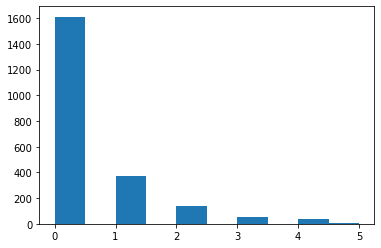

In [22]:
plt.hist(ifood_db_agg['R2Campaign'])
plt.show()

In [23]:
# Convert R2Campaign to binaries to represent those who did respond and those who did not (1,0) to run demographics on binary model
ifood_db_agg["R2Campaign"]=ifood_db_agg["R2Campaign"].replace([1, 2, 3, 4, 5], 1)


In [24]:
np.unique(ifood_db_agg['R2Campaign'], return_counts=True)

(array([0, 1]), array([1611,  605]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f775d569dd0>,
      dtype=object)

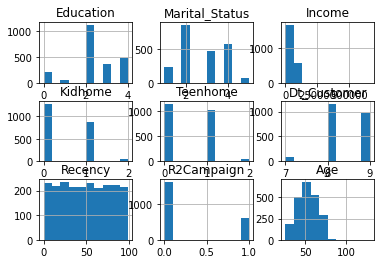

In [25]:
# Graph histogram to look for any patterns in the data by column
ifood_db_agg.hist()

In [26]:
ifood_db_agg.describe()

Education  Marital_Status         Income      Kidhome     Teenhome  \
count  2216.000000     2216.000000    2216.000000  2216.000000  2216.000000   
mean      2.393953        2.731047   52247.251354     0.441787     0.505415   
std       1.124141        1.062750   25173.076661     0.536896     0.544181   
min       0.000000        1.000000    1730.000000     0.000000     0.000000   
25%       2.000000        2.000000   35303.000000     0.000000     0.000000   
50%       2.000000        3.000000   51381.500000     0.000000     0.000000   
75%       3.000000        4.000000   68522.000000     1.000000     1.000000   
max       4.000000        5.000000  666666.000000     2.000000     2.000000   

       Dt_Customer      Recency   R2Campaign          Age  
count  2216.000000  2216.000000  2216.000000  2216.000000  
mean      8.399819    49.012635     0.273014    53.179603  
std       0.564471    28.948352     0.445609    11.985554  
min       7.000000     0.000000     0.000000    26.000000  
25%       8.000000    24.000000     0.000000    45.000000  
50%       8.000000    49.000000     0.000000    52.000000  
75%       9.000000    74.000000     1.000000    63.000000  
max       9.000000    99.000000     1.000000   129.000000

In [27]:
#Age and income are skewed. Looking for outliers to drop from dataframe

In [28]:
px.box(ifood_db_agg, y = "Income")

In [29]:
#Remove all rows of data that is above the upper fence (outliers)
dropdata = ifood_db_agg[ifood_db_agg['Income'] >113800].index

In [30]:
ifood_db_agg = ifood_db_agg.drop(dropdata)

In [31]:
px.box(ifood_db_agg, y = "Income")

In [32]:
px.box(ifood_db_agg, y = "Age")

In [33]:
dropdata2 = ifood_db_agg[ifood_db_agg['Age'] >82].index

In [34]:
ifood_db_agg = ifood_db_agg.drop(dropdata2)

In [35]:
px.box(ifood_db_agg, y = "Income")

In [36]:
ifood_db_agg.to_csv(r'clean_data.csv', header = True)

In [37]:
from pandas.plotting import scatter_matrix


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



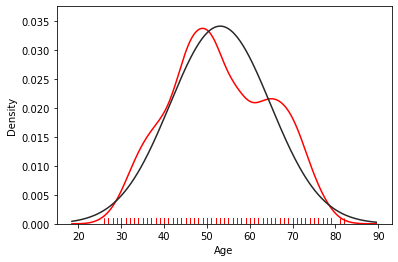

In [38]:
from scipy.stats import norm
sns.distplot(ifood_db_agg['Age'], hist=False, color='r', rug=True, fit=norm);

#Age has a normal distribution as proven below.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



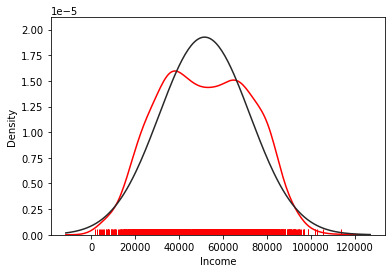

In [39]:
sns.distplot(ifood_db_agg['Income'], hist=False, color='r', rug=True, fit=norm);


In [40]:
#pip install bioinfokit

In [41]:
#pip install statsmodels --upgrade

In [42]:
#pip install pingouin

In [43]:
from scipy import stats as st

In [44]:
from bioinfokit.analys import get_data, stat
import pingouin as pg

In [45]:
#Create a dataframe for only those who responded to a campaign
Responded_db = ifood_db_agg[ifood_db_agg['R2Campaign'] == 1]
DNRespond = ifood_db_agg[ifood_db_agg['R2Campaign'] == 0]

In [46]:
ifood_db_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Education       2205 non-null   int64  
 1   Marital_Status  2205 non-null   int64  
 2   Income          2205 non-null   float64
 3   Kidhome         2205 non-null   int64  
 4   Teenhome        2205 non-null   int64  
 5   Dt_Customer     2205 non-null   float64
 6   Recency         2205 non-null   int64  
 7   R2Campaign      2205 non-null   int64  
 8   Age             2205 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 172.3 KB


In [62]:
# point-biserial correlation to measure significance (p-value is less than .05)
result = st.pointbiserialr(ifood_db_agg['R2Campaign'], ifood_db_agg['Age'])
print(f'correlation between Campaign Response and Age: {result[0]:.2f}')
print(f'p-value: {result[1]:.2g}')

correlation between Campaign Response and Age: 0.03
p-value: 0.13


In [63]:
# point-biserial correlation
# output is a tuple
result = st.pointbiserialr(ifood_db_agg['R2Campaign'], ifood_db_agg['Income'])
print(f'correlation between Income and Campaign Response: {result[0]:.2f}')
print(f'p-value: {result[1]:.2g}')

correlation between Income and Campaign Response: 0.30
p-value: 6.4e-47


In [64]:
# point-biserial correlation
# output is a tuple
result = st.pointbiserialr(ifood_db_agg['Education'], ifood_db_agg['R2Campaign'])
print(f'correlation between Education and Campaign Response: {result[0]:.2f}')
print(f'p-value: {result[1]:.2g}')

correlation between Education and Campaign Response: 0.07
p-value: 0.00079


In [65]:
# point-biserial correlation
# output is a tuple
result = st.pointbiserialr(ifood_db_agg['Marital_Status'], ifood_db_agg['R2Campaign'])
print(f'correlation between Marital Status and Campaign Response: {result[0]:.2f}')
print(f'p-value: {result[1]:.2g}')

correlation between Marital Status and Campaign Response: 0.00
p-value: 0.87


In [66]:
# point-biserial correlation
# output is a tuple
result = st.pointbiserialr(ifood_db_agg['Kidhome'], ifood_db_agg['R2Campaign'])
print(f'correlation between Kids at home and Campaign Response: {result[0]:.2f}')
print(f'p-value: {result[1]:.2g}')

correlation between Kids at home and Campaign Response: -0.17
p-value: 3.2e-15


In [67]:
# point-biserial correlation
# output is a tuple
result = st.pointbiserialr(ifood_db_agg['Teenhome'], ifood_db_agg['R2Campaign'])
print(f'correlation between teens at home and Campaign Response: {result[0]:.2f}')
print(f'p-value: {result[1]:.2g}')

correlation between teens at home and Campaign Response: -0.13
p-value: 1.3e-09


In [68]:
# point-biserial correlation
# output is a tuple
result = st.pointbiserialr(ifood_db_agg['R2Campaign'], ifood_db_agg['Dt_Customer'])
print(f'correlation between length of membership and Campaign Response: {result[0]:.2f}')
print(f'p-value: {result[1]:.2g}')

correlation between length of membership and Campaign Response: 0.08
p-value: 7.3e-05


In [69]:
# point-biserial correlation
# output is a tuple
result = st.pointbiserialr(ifood_db_agg['Recency'], ifood_db_agg['R2Campaign'])
print(f'correlation between number of visits to the site and Campaign Response: {result[0]:.2f}')
print(f'p-value: {result[1]:.2g}')

correlation between number of visits to the site and Campaign Response: -0.10
p-value: 1.5e-06


In [55]:
from supervised.automl import AutoML
from sklearn.model_selection import train_test_split


In [56]:
X = pd.DataFrame(data = ifood_db_agg, columns=['Education', 'Income','Kidhome','Teenhome', 'Dt_Customer', 'Recency'])
y = pd.Series(ifood_db_agg["R2Campaign"], name="R2Campaign").map({i:v for i, v in enumerate(ifood_db_agg["R2Campaign"])})

In [57]:
X

Education   Income  Kidhome  Teenhome  Dt_Customer  Recency
0             2  58138.0        0         0          9.0       58
1             2  46344.0        1         1          8.0       38
2             2  71613.0        0         0          8.0       26
3             2  26646.0        1         0          8.0       26
4             4  58293.0        1         0          8.0       94
...         ...      ...      ...       ...          ...      ...
2235          2  61223.0        0         1          8.0       46
2236          4  64014.0        2         1          7.0       56
2237          2  56981.0        0         0          8.0       91
2238          3  69245.0        0         1          8.0        8
2239          4  52869.0        1         1          9.0       40

[2205 rows x 6 columns]

In [58]:
y

0       0
1       1
2       1
3       1
4       1
       ..
2235    1
2236    0
2237    0
2238    1
2239    0
Name: R2Campaign, Length: 2205, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.25)

In [60]:
automl = AutoML(total_time_limit=5*60)
automl.fit(X_train, y_train)

AutoML directory: AutoML_8
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 0.586173 trained in 1.04 seconds
2_DecisionTree logloss 0.559341 trained in 9.21 seconds
3_Linear logloss 0.550069 trained in 3.6 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 0.551 trained in 5.56 seconds
5_Default_NeuralNetwork logloss 0.618134 trained in 1.91 seconds
6_Default_RandomForest logloss 0.545505 trained in 8.63 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.539521 trained in 0.88 seconds
AutoML fit time: 43.62 seconds
AutoML best model: Ensemble


AutoML(total_time_limit=300)

In [54]:
# Predict
y_predicted = automl.predict(X_test)

result = pd.DataFrame({"Predicted": y_predicted, "Target": np.array(y_test)})
filtro = result.Predicted == result.Target
print(filtro.value_counts(normalize=True))

True     0.76087
False    0.23913
dtype: float64


In [61]:
automl.report()